In [4]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [5]:
# Define the column names
column_names = ['unit_number', 'time_in_cycles', 'setting_1', 'setting_2', 'setting_3', 's_1', 's_2', 's_3',
                's_4', 's_5', 's_6', 's_7', 's_8', 's_9', 's_10', 's_11', 's_12', 's_13', 's_14',
                's_15', 's_16', 's_17', 's_18', 's_19', 's_20', 's_21']

In [6]:
# Use sep="\s+" to handle the inconsistent spacing in the file
train_df = pd.read_csv(r"C:\Users\Harish\Desktop\Pred_maintainance\CMaps\train_FD001.txt", sep="\s+", header=None, names=column_names)

In [7]:
print("Data loaded correctly. Here is a summary:")
train_df.info()

Data loaded correctly. Here is a summary:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20631 entries, 0 to 20630
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   unit_number     20631 non-null  int64  
 1   time_in_cycles  20631 non-null  int64  
 2   setting_1       20631 non-null  float64
 3   setting_2       20631 non-null  float64
 4   setting_3       20631 non-null  float64
 5   s_1             20631 non-null  float64
 6   s_2             20631 non-null  float64
 7   s_3             20631 non-null  float64
 8   s_4             20631 non-null  float64
 9   s_5             20631 non-null  float64
 10  s_6             20631 non-null  float64
 11  s_7             20631 non-null  float64
 12  s_8             20631 non-null  float64
 13  s_9             20631 non-null  float64
 14  s_10            20631 non-null  float64
 15  s_11            20631 non-null  float64
 16  s_12            20631 non-null  fl

In [8]:
train_df.head()

,unit_number,time_in_cycles,setting_1,setting_2,setting_3,s_1,s_2,s_3,s_4,s_5,...,s_12,s_13,s_14,s_15,s_16,s_17,s_18,s_19,s_20,s_21
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,521.66,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,522.28,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,522.42,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,522.86,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,522.19,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044


In [9]:
# --- Calculate RUL ---
# Find the total life for each engine (max time_in_cycles)
max_cycles_df = train_df.groupby('unit_number')['time_in_cycles'].max().reset_index()
max_cycles_df.columns = ['unit_number', 'max_cycles']

In [10]:
# Merge the max_cycles back into the original training data
train_df = pd.merge(train_df, max_cycles_df, on='unit_number', how='left')

In [11]:
# Calculate the RUL for each row
train_df['RUL'] = train_df['max_cycles'] - train_df['time_in_cycles']

In [12]:
# Drop the 'max_cycles' column as we no longer need it
train_df.drop(columns=['max_cycles'], inplace=True)

In [13]:
# Display the first 5 rows and the last 5 rows to see the RUL column
print("RUL calculated successfully. Here are the first and last 5 rows:")
display(train_df.head())
display(train_df.tail())

RUL calculated successfully. Here are the first and last 5 rows:


,unit_number,time_in_cycles,setting_1,setting_2,setting_3,s_1,s_2,s_3,s_4,s_5,...,s_13,s_14,s_15,s_16,s_17,s_18,s_19,s_20,s_21,RUL
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190,191
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236,190
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442,189
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739,188
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044,187


,unit_number,time_in_cycles,setting_1,setting_2,setting_3,s_1,s_2,s_3,s_4,s_5,...,s_13,s_14,s_15,s_16,s_17,s_18,s_19,s_20,s_21,RUL
20626,100,196,-0.0004,-0.0003,100.0,518.67,643.49,1597.98,1428.63,14.62,...,2388.26,8137.60,8.4956,0.03,397,2388,100.0,38.49,22.9735,4
20627,100,197,-0.0016,-0.0005,100.0,518.67,643.54,1604.50,1433.58,14.62,...,2388.22,8136.50,8.5139,0.03,395,2388,100.0,38.30,23.1594,3
20628,100,198,0.0004,0.0000,100.0,518.67,643.42,1602.46,1428.18,14.62,...,2388.24,8141.05,8.5646,0.03,398,2388,100.0,38.44,22.9333,2
20629,100,199,-0.0011,0.0003,100.0,518.67,643.23,1605.26,1426.53,14.62,...,2388.23,8139.29,8.5389,0.03,395,2388,100.0,38.29,23.0640,1
20630,100,200,-0.0032,-0.0005,100.0,518.67,643.85,1600.38,1432.14,14.62,...,2388.26,8137.33,8.5036,0.03,396,2388,100.0,38.37,23.0522,0


In [14]:
##Scaling
from sklearn.preprocessing import MinMaxScaler

In [15]:
# Define the columns that need to be scaled
cols_to_scale = ['setting_1', 'setting_2', 'setting_3', 's_1', 's_2', 's_3', 's_4', 's_5', 's_6', 's_7', 
                 's_8', 's_9', 's_10', 's_11', 's_12', 's_13', 's_14', 's_15', 's_16', 's_17', 's_18', 
                 's_19', 's_20', 's_21']

In [16]:
# Create a scaler object
scaler = MinMaxScaler()

# Fit the scaler to the data and transform it
train_df[cols_to_scale] = scaler.fit_transform(train_df[cols_to_scale])

In [17]:
print("Data scaled successfully:")
train_df.head()

Data scaled successfully:


,unit_number,time_in_cycles,setting_1,setting_2,setting_3,s_1,s_2,s_3,s_4,s_5,...,s_13,s_14,s_15,s_16,s_17,s_18,s_19,s_20,s_21,RUL
0,1,1,0.459770,0.166667,0.0,0.0,0.183735,0.406802,0.309757,0.0,...,0.205882,0.199608,0.363986,0.0,0.333333,0.0,0.0,0.713178,0.724662,191
1,1,2,0.609195,0.250000,0.0,0.0,0.283133,0.453019,0.352633,0.0,...,0.279412,0.162813,0.411312,0.0,0.333333,0.0,0.0,0.666667,0.731014,190
2,1,3,0.252874,0.750000,0.0,0.0,0.343373,0.369523,0.370527,0.0,...,0.220588,0.171793,0.357445,0.0,0.166667,0.0,0.0,0.627907,0.621375,189
3,1,4,0.540230,0.500000,0.0,0.0,0.343373,0.256159,0.331195,0.0,...,0.294118,0.174889,0.166603,0.0,0.333333,0.0,0.0,0.573643,0.662386,188
4,1,5,0.390805,0.333333,0.0,0.0,0.349398,0.257467,0.404625,0.0,...,0.235294,0.174734,0.402078,0.0,0.416667,0.0,0.0,0.589147,0.704502,187


In [18]:
import matplotlib.pyplot as plt 
import seaborn as sns

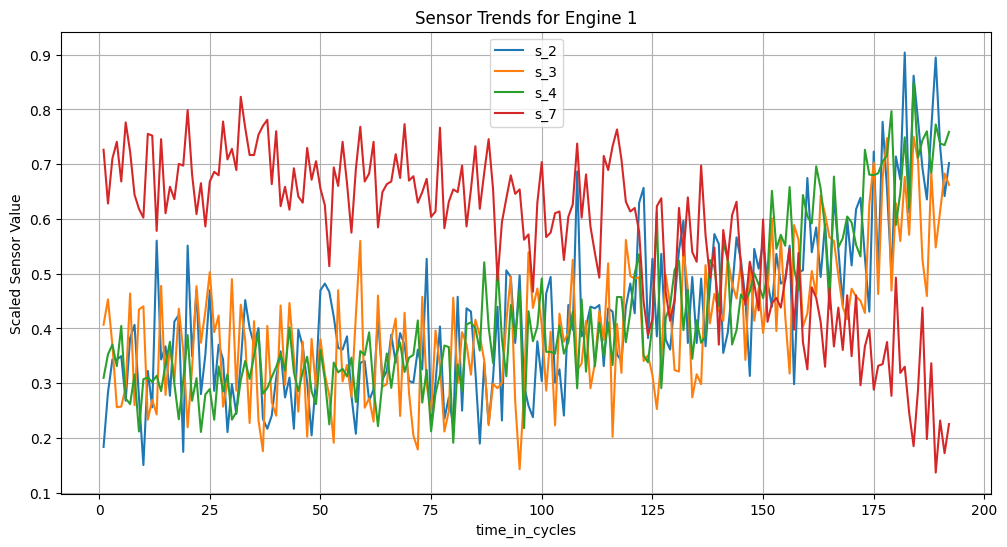

In [19]:
# Select data for a single engine (e.g., unit_number 1)
engine_df = train_df[train_df['unit_number'] == 1]

# Plot the sensor values over time
ax = engine_df.plot(x='time_in_cycles', y=['s_2', 's_3', 's_4', 's_7'], figsize=(12, 6))
ax.set_ylabel('Scaled Sensor Value')
ax.set_title('Sensor Trends for Engine 1')
plt.grid(True)
plt.show()

In [20]:
def generate_sequences(df, sequence_length, sequence_cols):
    """
    This function takes a dataframe and returns a 3D array of sequences
    and a 1D array of corresponding RULs.
    """
    X_sequences, y_sequences = [], []
    for unit_num in df['unit_number'].unique():
        unit_df = df[df['unit_number'] == unit_num]
        for i in range(len(unit_df) - sequence_length):
            # The sequence of sensor data
            X_sequences.append(unit_df[sequence_cols].iloc[i:i+sequence_length].values)
            # The RUL at the end of the sequence
            y_sequences.append(unit_df['RUL'].iloc[i+sequence_length-1])
    return np.array(X_sequences), np.array(y_sequences)

In [21]:
# Define the sequence length and the columns to use
sequence_length = 30
sequence_cols = ['setting_1', 'setting_2', 'setting_3'] + [f's_{i}' for i in range(1, 22)]

In [22]:
# Generate the training sequences
X_train, y_train = generate_sequences(train_df, sequence_length, sequence_cols)

In [23]:
# Print the shape of the new arrays to verify
print("Shape of X_train:", X_train.shape)
print("Shape of y_train:", y_train.shape)

Shape of X_train: (17631, 30, 24)
Shape of y_train: (17631,)


In [24]:
## Build and Train the LSTM Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

In [25]:
# --- Build the LSTM Model ---
model = Sequential()
model.add(LSTM(
         units=100,
         return_sequences=True,
         input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.2))
model.add(LSTM(
          units=50,
          return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(units=1))

In [26]:
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [27]:
# Print the model summary
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 30, 100)             │          50,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 30, 100)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 50)                  │          30,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 50)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 80,251 (313.48 KB)

 Trainable params: 80,251 (313.48 KB)

 Non-trainable params: 0 (0.00 B)

In [28]:
# --- Train the Model ---
print("\nTraining the model...")
history = model.fit(X_train, y_train, epochs=40, batch_size=64, validation_split=0.2, verbose=1)
print("Model training finished.")


Training the model...
Epoch 1/40
221/221 ━━━━━━━━━━━━━━━━━━━━ 19s 53ms/step - loss: 10376.9336 - val_loss: 12629.5625
Epoch 2/40
221/221 ━━━━━━━━━━━━━━━━━━━━ 20s 50ms/step - loss: 8103.1821 - val_loss: 10917.7646
Epoch 3/40
221/221 ━━━━━━━━━━━━━━━━━━━━ 11s 51ms/step - loss: 6789.9014 - val_loss: 9567.2812
Epoch 4/40
221/221 ━━━━━━━━━━━━━━━━━━━━ 12s 52ms/step - loss: 5818.3867 - val_loss: 8498.8975
Epoch 5/40
221/221 ━━━━━━━━━━━━━━━━━━━━ 11s 49ms/step - loss: 5092.3447 - val_loss: 7665.9429
Epoch 6/40
221/221 ━━━━━━━━━━━━━━━━━━━━ 11s 51ms/step - loss: 4604.2090 - val_loss: 7023.1953
Epoch 7/40
221/221 ━━━━━━━━━━━━━━━━━━━━ 11s 50ms/step - loss: 4066.7661 - val_loss: 6544.6821
Epoch 8/40
221/221 ━━━━━━━━━━━━━━━━━━━━ 11s 51ms/step - loss: 3854.9712 - val_loss: 6188.5620
Epoch 9/40
221/221 ━━━━━━━━━━━━━━━━━━━━ 11s 51ms/step - loss: 3716.1365 - val_loss: 5932.1045
Epoch 10/40
221/221 ━━━━━━━━━━━━━━━━━━━━ 11s 51ms/step - loss: 3575.7576 - val_loss: 5753.2783
Epoch 11/40
221/221 ━━━━━━━━━━━━━

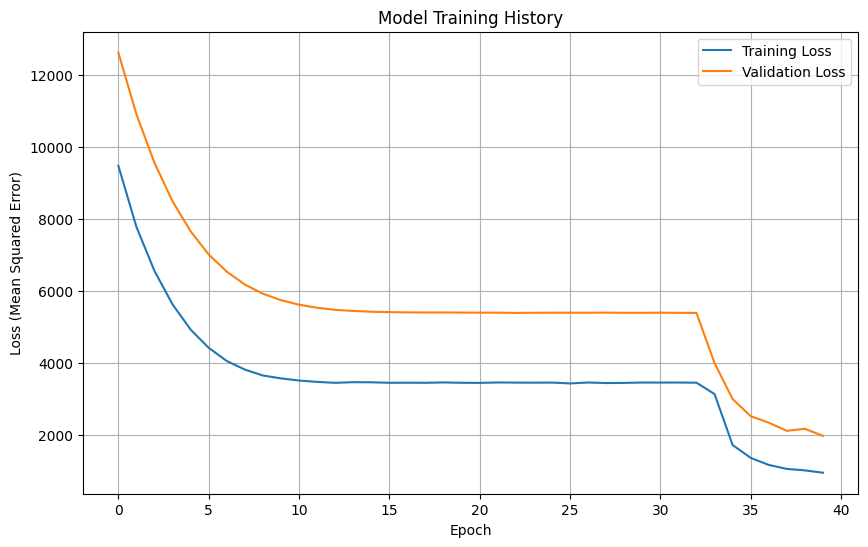

In [29]:
# --- Plot the training history ---
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Training History')
plt.xlabel('Epoch')
plt.ylabel('Loss (Mean Squared Error)')
plt.legend()
plt.grid(True)
plt.show()

In [30]:
## Load and Prepare the Test Data
# --- Load the test data ---
test_df = pd.read_csv(r"C:\Users\Harish\Desktop\Pred_maintainance\CMaps\test_FD001.txt", sep="\s+", header=None, names=column_names)

# --- Load the true RUL values for the test data ---
true_rul_df = pd.read_csv(r"C:\Users\Harish\Desktop\Pred_maintainance\CMaps\RUL_FD001.txt", sep="\s+", header=None, names=['true_RUL'])

In [31]:
# Display the first 5 rows of each to verify
print("Test data loaded successfully:")
display(test_df.head())
print("\nTrue RUL values for the test set loaded successfully:")
display(true_rul_df.head())

Test data loaded successfully:


,unit_number,time_in_cycles,setting_1,setting_2,setting_3,s_1,s_2,s_3,s_4,s_5,...,s_12,s_13,s_14,s_15,s_16,s_17,s_18,s_19,s_20,s_21
0,1,1,0.0023,0.0003,100.0,518.67,643.02,1585.29,1398.21,14.62,...,521.72,2388.03,8125.55,8.4052,0.03,392,2388,100.0,38.86,23.3735
1,1,2,-0.0027,-0.0003,100.0,518.67,641.71,1588.45,1395.42,14.62,...,522.16,2388.06,8139.62,8.3803,0.03,393,2388,100.0,39.02,23.3916
2,1,3,0.0003,0.0001,100.0,518.67,642.46,1586.94,1401.34,14.62,...,521.97,2388.03,8130.10,8.4441,0.03,393,2388,100.0,39.08,23.4166
3,1,4,0.0042,0.0000,100.0,518.67,642.44,1584.12,1406.42,14.62,...,521.38,2388.05,8132.90,8.3917,0.03,391,2388,100.0,39.00,23.3737
4,1,5,0.0014,0.0000,100.0,518.67,642.51,1587.19,1401.92,14.62,...,522.15,2388.03,8129.54,8.4031,0.03,390,2388,100.0,38.99,23.4130



True RUL values for the test set loaded successfully:


,true_RUL
0,112
1,98
2,69
3,82
4,91


In [32]:
#  Scale the test data ---
# We use the SAME scaler that was fitted on the training data
test_df[cols_to_scale] = scaler.transform(test_df[cols_to_scale])

In [33]:
X_test_sequences = []
for unit_num in test_df['unit_number'].unique():
    unit_df = test_df[test_df['unit_number'] == unit_num]
    # Take the last 'sequence_length' records
    sequence = unit_df[sequence_cols].tail(sequence_length).values
    X_test_sequences.append(sequence)

X_test = np.array(X_test_sequences)

In [34]:
# The 'y_test' is simply the true RUL values we loaded earlier
y_test = true_rul_df['true_RUL'].values

print("Shape of X_test:", X_test.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_test: (100, 30, 24)
Shape of y_test: (100,)


In [35]:
## Evaluation
from sklearn.metrics import mean_squared_error

In [36]:
# --- Make predictions on the test data ---
y_pred = model.predict(X_test)

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 236ms/step


In [37]:
# --- Calculate the Root Mean Squared Error (RMSE) ---
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Final RMSE on the test set: {rmse:.2f} cycles")

Final RMSE on the test set: 17.85 cycles


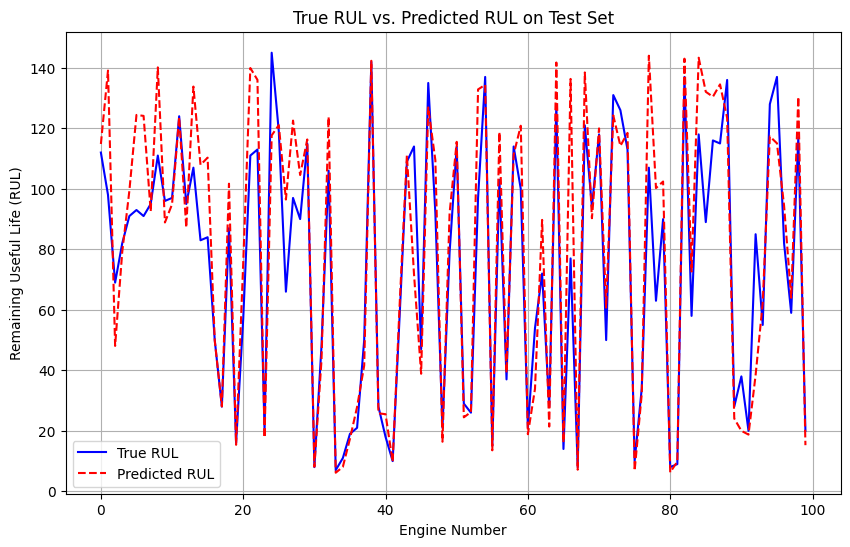

In [38]:
plt.figure(figsize=(10, 6))
plt.plot(y_test, label='True RUL', color='blue')
plt.plot(y_pred, label='Predicted RUL', color='red', linestyle='--')
plt.title('True RUL vs. Predicted RUL on Test Set')
plt.xlabel('Engine Number')
plt.ylabel('Remaining Useful Life (RUL)')
plt.legend()
plt.grid(True)
plt.show()

In [39]:
# Calculate the average RUL in the test set
average_rul = y_test.mean()

# Calculate the percentage error
percentage_error = (rmse / average_rul) * 100

print(f"The average true RUL in the test set is: {average_rul:.2f} cycles")
print(f"Our model's average error (RMSE) is: {rmse:.2f} cycles")
print(f"This means our model's prediction is off by an average of {percentage_error:.2f}%")

The average true RUL in the test set is: 75.52 cycles
Our model's average error (RMSE) is: 17.85 cycles
This means our model's prediction is off by an average of 23.63%


In [40]:
from sklearn.metrics import r2_score

# Calculate the R-squared score
r2 = r2_score(y_test, y_pred)

print(f"The R-squared (R²) score on the test set is: {r2:.2f}")

The R-squared (R²) score on the test set is: 0.82


In [41]:
from tensorflow.keras.models import load_model
import joblib

In [42]:
import os

In [43]:
save_dir = r'C:\Users\Harish\Desktop\Pred_maintainance'

In [44]:
os.makedirs(save_dir, exist_ok=True)
print(f"Directory '{save_dir}' is ready.")

# --- Construct the full file paths ---
model_path = os.path.join(save_dir, 'rul_prediction_model.h5')
scaler_path = os.path.join(save_dir, 'scaler.pkl')

# --- Save the model and scaler to the specified paths ---
# Make sure your final model is named 'model'
model.save(model_path)
joblib.dump(scaler, scaler_path)

print(f"Model saved successfully to: {model_path}")
print(f"Scaler saved successfully to: {scaler_path}")

Directory 'C:\Users\Harish\Desktop\Pred_maintainance' is ready.
Model saved successfully to: C:\Users\Harish\Desktop\Pred_maintainance\rul_prediction_model.h5
Scaler saved successfully to: C:\Users\Harish\Desktop\Pred_maintainance\scaler.pkl
